In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import segyio
import matplotlib.patches as patches
from shapely.geometry import Polygon
import pandas as pd
import re
from scipy.interpolate import griddata

In [2]:
def read_seismic_cube(file_path):
   """
   :param file_path: Путь к файлу
   :return: возвращает куб в виде списков по Inlines, Xlines и Sampels (координаты x, y, z)
   а также словарю сейсмотрасс, где ключ это координата пересечения Inlines и Xlines, а значение это список значений сейсмотрасс
   """
   with segyio.open(file_path, 'r') as segyfile:
       x = list(segyfile.ilines)
       y = list(segyfile.xlines)
       z = list(segyfile.samples)
       cube = segyio.tools.cube(segyfile)
       traces = {f"{x[i]}_{y[j]}": cube[i][j][:] for i in range(len(x)) for j in range(len(y))}
   return x, y, z, traces


In [4]:
def mean_of_abs(list_value):
   """
   считает среднее по модулю значение сейсмотрассы
   :param list_value: сейсмотрасса
   :return: среднее значение
   """
   abs_value = [abs(v) for v in list_value]
   mean_value = sum(abs_value) / len(abs_value)
   return mean_value


In [5]:
def point_in_polygon(point, polygon):
    """
    Проверяет находится ли точка в полигоне (внутри краевой зоны)
    :param point: точка с координатами (пересечение инлайнов и крослайнов)
    :param polygon: краевая зона в виде полигона
    :return: 1 если точка внутри полигона, 0 иначе
    """
    # Преобразование строки координат точки в кортеж чисел
    point = tuple(map(int, point.split('_')))
    # Преобразование списка строк координат полигона в список кортежей чисел
    polygon = [tuple(map(int, coord.split('_'))) for coord in polygon]
    # Создание объекта Path из координат полигона
    path = Path(polygon)
    # Проверка принадлежности точки полигону
    return 1 if path.contains_point(point) else 0

In [6]:
def show_map(data_dict):
    # Преобразование словаря в списки координат и значений
    coordinates = [tuple(map(int, key.split('_'))) for key in data_dict.keys()]
    values = list(data_dict.values())

    # Разделение координат на списки x и y
    x_coords, y_coords = zip(*coordinates)

    # Создание сетки для интерполяции значений
    grid_x, grid_y = np.mgrid[min(x_coords):max(x_coords):100j, min(y_coords):max(y_coords):100j]

    # Интерполяция значений для создания тепловой карты
    grid_z = griddata(coordinates, values, (grid_x, grid_y), method='cubic')

    # Отображение тепловой карты
    plt.imshow(grid_z.T, extent=(min(x_coords), max(x_coords), min(y_coords), max(y_coords)), origin='lower')
    plt.scatter(x_coords, y_coords, c=values)  # Отображение исходных точек
    plt.colorbar()  # Добавление шкалы цвета

    #points = ['700_450', '800_475', '725_475', '780_565']
    points = []
    for point in points:
        x, y = key_to_coords(point)
        plt.scatter(y - 1, x - 1, color='red', s=20)

    plt.show()


In [7]:
def key_to_coords(key):
   x, y = key.split("_")
   return int(x), int(y)

In [9]:
#file_path = 'C:/HV/Seismic/1.1_edge_zone/Cube_TWT.segy'
file_path = 'C:/HV/Seismic/datas/Geobody_cube.segy'
ilines, xlines, samples, traces = read_seismic_cube(file_path)


In [10]:
map_amplitude = {}
for key in traces:
   #if point_in_polygon(key, edge_zona) == 1:
   #map_amplitude[key] = mean_of_abs(traces[key][10])
   map_amplitude[key] = traces[key][-3]
show_map(map_amplitude) 


KeyboardInterrupt: 

In [11]:
def show_map_2(data_dict):
   # Преобразование словаря в списки координат и значений
   coordinates = [tuple(map(int, key.split('_'))) for key in data_dict.keys()]
   values = list(data_dict.values())


   # Разделение координат на списки x и y
   x_coords, y_coords = zip(*coordinates)

   # Создание сетки для интерполяции значений
   grid_x, grid_y = np.mgrid[min(x_coords):max(x_coords):100j, min(y_coords):max(y_coords):100j]

   # Интерполяция значений для создания тепловой карты
   grid_z = griddata(coordinates, values, (grid_x, grid_y), method='cubic')

   # Подписи осей
   plt.xlabel('Inlines')
   plt.ylabel('Xlines')

   # Отображение тепловой карты
   plt.imshow(grid_z.T, extent=(min(x_coords), max(x_coords), min(y_coords), max(y_coords)), origin='lower')
   plt.scatter(x_coords, y_coords, c=values)  # Отображение исходных точек
   plt.colorbar()  # Добавление шкалы цвета
  
   #points = ['700_450', '800_475', '725_475', '780_565']
   points = []
   for point in points:
       x, y = key_to_coords(point)
       plt.scatter(y-1, x-1, color='red', s=20)
  
   plt.show()


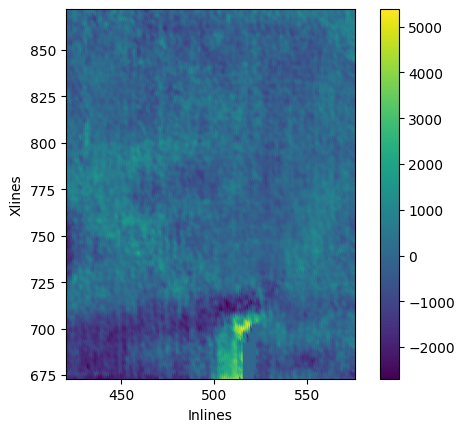

[1584.0, 1586.0, 1588.0, 1590.0, 1592.0, 1594.0, 1596.0, 1598.0, 1600.0, 1602.0, 1604.0, 1606.0, 1608.0, 1610.0, 1612.0, 1614.0, 1616.0, 1618.0, 1620.0, 1622.0, 1624.0, 1626.0, 1628.0, 1630.0, 1632.0, 1634.0, 1636.0, 1638.0, 1640.0, 1642.0, 1644.0, 1646.0, 1648.0, 1650.0, 1652.0, 1654.0, 1656.0, 1658.0, 1660.0, 1662.0, 1664.0, 1666.0, 1668.0, 1670.0, 1672.0, 1674.0, 1676.0, 1678.0, 1680.0, 1682.0, 1684.0, 1686.0, 1688.0, 1690.0, 1692.0, 1694.0, 1696.0, 1698.0, 1700.0, 1702.0, 1704.0, 1706.0, 1708.0, 1710.0, 1712.0, 1714.0, 1716.0, 1718.0, 1720.0, 1722.0, 1724.0, 1726.0, 1728.0, 1730.0, 1732.0, 1734.0, 1736.0, 1738.0, 1740.0, 1742.0, 1744.0, 1746.0, 1748.0, 1750.0, 1752.0, 1754.0, 1756.0, 1758.0, 1760.0, 1762.0, 1764.0, 1766.0, 1768.0, 1770.0, 1772.0, 1774.0, 1776.0, 1778.0, 1780.0, 1782.0, 1784.0, 1786.0, 1788.0, 1790.0, 1792.0, 1794.0]
[-4.8325589e+02 -1.3807312e+02 -2.2977942e-05  3.4518274e+02
  7.5940204e+02  1.2426580e+03  1.2426580e+03  1.3807307e+02
 -1.5878407e+03 -3.3137546e+0

In [12]:
show_map_2(map_amplitude)
print(samples)
print(traces['425_678'])

In [13]:
def loc_max(values):
 """
 Функция ищет выбросы (локальные максимумы) с помощью скользящего интервала
 :param values: список линии  по Inlines или Xlines
 :return:
 """
 local_max = []
 for i in range(0, len(values) - 10 + 1, 3):
     # Выбираем текущий интервал
     current_interval = values[i:i + 10]
     # Находим максимум в текущем интервале
     max_value = max(current_interval)
     # Если максимум не равен 0, находим его индекс
     if max_value != 0:
         max_index = i + current_interval.index(max_value)
         # Проверяем, есть ли уже такой индекс в списке local_max
         if not any(max_index == existing_index for _, existing_index in local_max):
             local_max.append((max_value, max_index))
 return local_max

In [14]:
def plot_coordinate(data_dict, coord_string):
   parts = coord_string.split('=')
   axis = parts[0].strip().lower()
   value = int(parts[1].strip())
   #print(parts, axis, value)
   x_values = []
   y_values = []
   values = []

   for key in data_dict:
       coords = key.split('_')
       x = int(coords[0][0:])  # Преобразуем в стандартный тип int
       y = int(coords[1][0:])  # Преобразуем в стандартный тип int
       #print(key, x, y)
       if axis == 'x' and x == int(value):
           x_values.append(y)
           values.append(data_dict[key])
       if axis == 'y' and y == int(value):
           x_values.append(x)
           values.append(data_dict[key])

   return values


In [15]:
values_on_lines = plot_coordinate(map_amplitude, 'y=750')
print(loc_max(values_on_lines))



[(345.18274, 7), (345.18274, 14), (966.5117, 24), (1242.658, 27), (1104.5848, 31), (1104.5848, 38), (1449.7676, 45), (966.5117, 49), (759.40204, 56), (345.18274, 57), (138.07307, 65), (-2.2977942e-05, 66), (483.25583, 78), (-2.2977942e-05, 81), (-2.2977942e-05, 84), (-2.2977942e-05, 88), (-2.2977942e-05, 92), (-2.2977942e-05, 100), (-2.2977942e-05, 104), (-138.07312, 105), (-138.07312, 108), (138.07307, 119), (345.18274, 122), (621.3289, 132), (966.5117, 135), (966.5117, 138), (483.25583, 145), (345.18274, 148)]


In [16]:
def futprint_i(map):
   delta_t = 0
   delta_value = 0
   chet_vershin = 0
   futprint_ilines = []
   for i in range(len(ilines)):
       values_lines = loc_max(plot_coordinate(map, 'x='+str(ilines[i])))
       if len(values_lines) != 0:
           delta_t = values_lines[1][1] - values_lines[0][1]
           delta_value = values_lines[0][0]
           for j in range(len(values_lines)-1):
               if (delta_t*0.9) <= (values_lines[j+1][1] - values_lines[j][1])  <= (delta_t*1.1):
                   if (delta_value*0.9) <= values_lines[j][0] <= (delta_value*1.1):
                       chet_vershin +=1
                   else:
                       chet_vershin = 0
                       continue
               else:
                   chet_vershin = 0
               if chet_vershin == 5:
                   for k in range(5):
                       futprint_ilines.append(str(ilines[i])+'_'+str(xlines[values_lines[j-k][1]]))
       else:
           continue
             
   return futprint_ilines

In [17]:
f_i = []
for l in range(len(samples)):
    for key in traces:
        map_amplitude[key] = traces[key][l]
    f_i.append(futprint_i(map_amplitude))
print(f_i)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [ ]:
def futprint_x(map):
    delta_t = 0
    delta_value = 0
    chet_vershin = 0
    futprint_xlines = []
    for i in range(len(xlines)):
        values_lines = loc_max(plot_coordinate(map, 'y=' + str(xlines[i])))
        if len(values_lines) != 0:
            delta_t = values_lines[1][1] - values_lines[0][1]
            delta_value = values_lines[0][0]
            #print(len(values_lines))
            for j in range(len(values_lines) - 1):
                if (delta_t * 0.9) <= (values_lines[j + 1][1] - values_lines[j][1]) <= (delta_t * 1.1):
                    if (delta_value * 0.9) <= values_lines[j][0] <= (delta_value * 1.1):
                        chet_vershin += 1
                    else:
                        chet_vershin = 0
                        continue
                else:
                    chet_vershin = 0
                if chet_vershin == 5:
                    for k in range(5):
                        futprint_xlines.append(str(ilines[values_lines[j - k][1]]) + '_' + str(xlines[i]))
        else:
            continue

    return futprint_xlines


f_x = []
for l in range(len(samples)):
    for key in traces:
        map_amplitude[key] = traces[key][l]
    f_x.append(futprint_x(map_amplitude))
print(f_x)

In [ ]:
print(ilines)
print()
print(xlines)

In [ ]:
# Создание массивов координат и значений для построения карты
coords = [key_to_coords(key) for key in map_amplitude.keys()]
values = list(map_amplitude.values())


# Создание массивов координат для нанесения точек
points_coords = []
for sublist in f_x:
   for point in sublist:
       points_coords.append(key_to_coords(point))


# Разделение координат на X и Y
x_coords, y_coords = zip(*coords)
x_points, y_points = zip(*points_coords) if f_x else ([], [])


# Создание графика
plt.figure(figsize=(8, 8))


# Построение карты
plt.scatter(x_coords, y_coords, c=values, cmap='viridis', s=200)


# Нанесение точек
plt.scatter(x_points, y_points, c='red', s=50)


# Настройка осей
plt.xlim(min(x_coords) - 1, max(x_coords) + 1)
plt.ylim(min(y_coords) - 1, max(y_coords) + 1)
plt.gca().set_aspect('equal', adjustable='box')


# Показ графика
plt.show()
